# Исследование данных

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
#Устанавливаем для отбражения графиков
%matplotlib inline

In [7]:
#Создать переменную и считать в нее файл
training_set = pd.read_csv('train.csv')

In [8]:
#Показать первые пять строк таблицы 

#PassengerId- индификационный номер пасажира
#Survived - Выжившие
#Pclass - класс которым ехал пассажир
#Name - Имя пассажира
#Sex - Пол
#Age - Возраст
#SibSp -братья,сестры,супруги
#Parch - родители , дети
#Ticket -билет№
#Fare - цена билета
#Cabin - номер-место
#Embarked - место посадки

training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

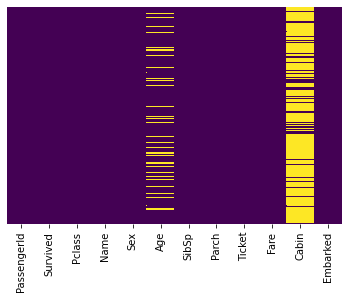

In [10]:
#Желтым указано отсутствие данных
#training_set.isnull() - Выяснить отсутствующие данные
#yticklabels -
#cbar-
#cmap-
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
#Установить стиль таблицы shift+tab
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

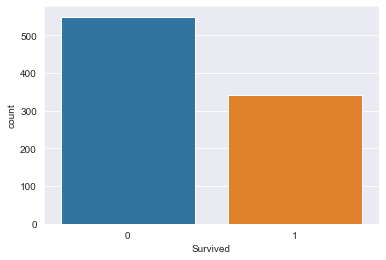

In [12]:
#Узнать соотношение выживших к не выжившим
sns.countplot(x='Survived', data=training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

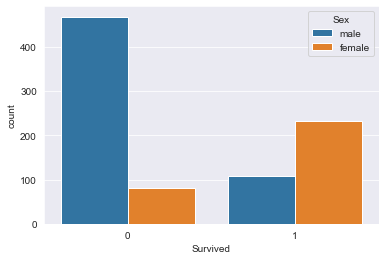

In [13]:
# Выжившие,классификация по полу
sns.countplot(x='Survived', data=training_set, hue='Sex')

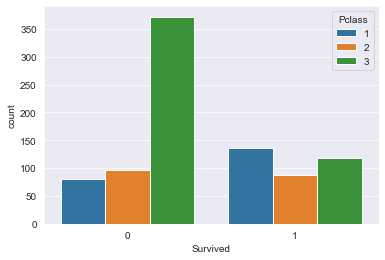

In [12]:
#Классификация по классу среди выживших
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

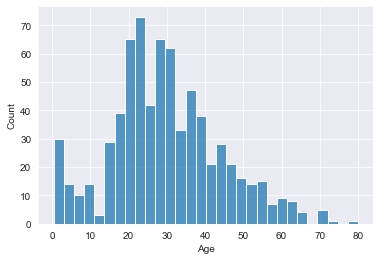

In [15]:
#Возраст людей на титанике
#dropna() - убрать пустые значения
# bins-количество столбиков
sns.histplot(training_set['Age'].dropna(), kde=False, bins=30)

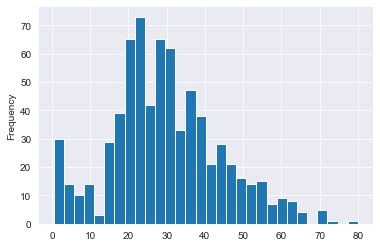

In [14]:
# bins-количество столбиков
training_set['Age'].plot.hist(bins=30)

In [15]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


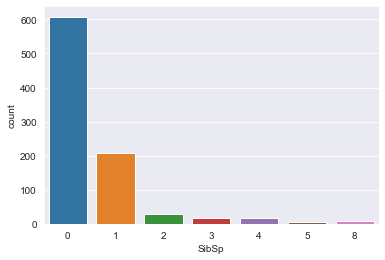

In [16]:
#количество супругов, братьев-сестер(пар)
sns.countplot(x='SibSp', data=training_set)

<AxesSubplot:>

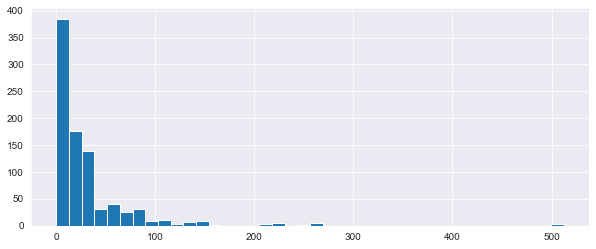

In [16]:
#Цена билета которых продано больше всего
training_set['Fare'].hist(bins=40, figsize=(10,4))

# Обработка отсутствующих данных. Подготовка данных

<AxesSubplot:>

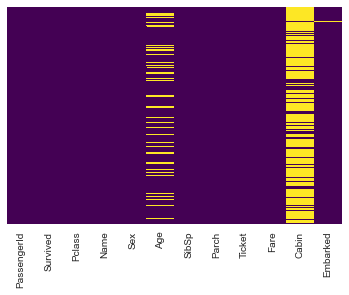

In [17]:
#Желтым указано отсутствие данных
#training_set.isnull() - Выяснить отсутствующие данные
#yticklabels -
#cbar-
#cmap-
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

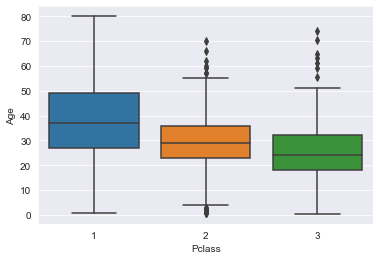

In [18]:
#Узнать средний возраст пассажиров 1,2 и 3 классов
sns.boxplot(x='Pclass', y='Age', data=training_set)

Функция заполняющая пустые ячейки средними значениями из таблицы

In [18]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
training_set['Age'] = training_set[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

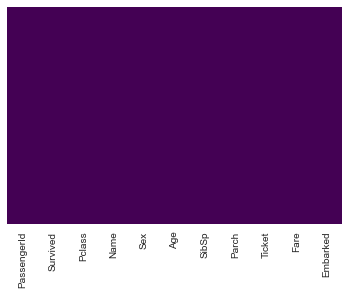

In [30]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
#Убрать столбец Cabin
training_set.drop('Cabin', axis=1, inplace=True)

In [23]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
# Удалить строки с отсутствующими значениями из оставшегося списка столбцов
training_set.dropna(inplace=True)

Конвертация категорийных характеристик

In [25]:
#Создание фиктивной переменной для отличия пола(male и female) из буквенного значения(str) в целочисленное(0 и 1)(int) 
# для дальнейшей работы с данными
#Shift+tab
#drop_first - Удаляет первый столбец для правильной работы алгоритма
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [26]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
##Создание фиктивной переменной для отличия буквенного значения S,C,Q(str) в целочисленное(0 и 1)(int),Категорийные переменные в фиктивные
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [28]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
#Добавим столбцы embark и sex в наше множество данных training_set
#axis=1 -для того чтобы указать что это будут столбцы
training_set = pd.concat([training_set, sex, embark], axis=1)

In [30]:
#	male(sex)	Q и S(Embarked) это созданные столбцы замены для алгоритма машинного обучения
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [47]:
#Удалить столбцы не учавствующие в алгоритме машинного обучения
#inplace=True -  Удаление с изменением в таблице
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [48]:
#Удалим и PassengerId так как видно ниже что это список дублирует основной индекс таблицы с разницей в единицу
training_set.drop('PassengerId', axis=1, inplace=True)

In [49]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [50]:
#Просмотреть 5 финальных строк таблицы 
training_set.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare
886,0,2,27.0,0,0,13.00
887,1,1,19.0,0,0,30.00
888,0,3,24.0,1,2,23.45
889,1,1,26.0,0,0,30.00
890,0,3,32.0,0,0,7.75


# Работа с моделью(данными)

In [51]:
#отбросим столбец из основной таблицы
X = training_set.drop('Survived', axis=1)
# то что мы хотим прогнозировать
y = training_set['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#Разбиваем данные на тренировочные и тестовые
#train_test_split +shift+tab и скопировать и вставить код ниже убрав многоточие
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=333)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
#Создать объект
lrm = LogisticRegression()

In [56]:
#fit тренировка модели
lrm.fit(X_train, y_train)

LogisticRegression()

In [63]:
#Строим прогнозы
predictions = lrm.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

Оценка производительности модели

In [74]:
from sklearn.metrics import classification_report

In [75]:
#Получить отчет
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       217
           1       0.65      0.42      0.51       139

    accuracy                           0.69       356
   macro avg       0.67      0.64      0.64       356
weighted avg       0.68      0.69      0.67       356



In [71]:
from sklearn.metrics import confusion_matrix

In [70]:
#Матрица ошибок
confusion_matrix(y_test, predictions)

array([[186,  31],
       [ 81,  58]], dtype=int64)

             спрогнозированно
истино положительный  ложно отрицательный
        (TP) +               (FN)                   
                                                 фактические данные
Ложно положительный   Истинно отрицательно
        (FP)                 (TN)